In [ ]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `curve` mode scenario of `plot_image` function.

For valid parameters info address `MatplotlibPlotter.curve` documentation.

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.append('../..')
from seismiqb import plot_loss

../../seismiqb/batchflow/batchflow/notifier.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm as tqdm_auto


In [3]:
# Generate sample data

x = np.linspace(1, 100, 1000)

oscillation = lambda x: np.sin(x) / x + np.random.normal(scale=0.1, size=len(x))

y0 = -np.log(x) * np.random.rand() + oscillation(x)
y1 = -np.log(x) * np.random.rand() + oscillation(x)

To display a single curve use `plot_loss`, since it has nicer defaults for loss ploting that `plot_image`, which is a more general-purpose function.

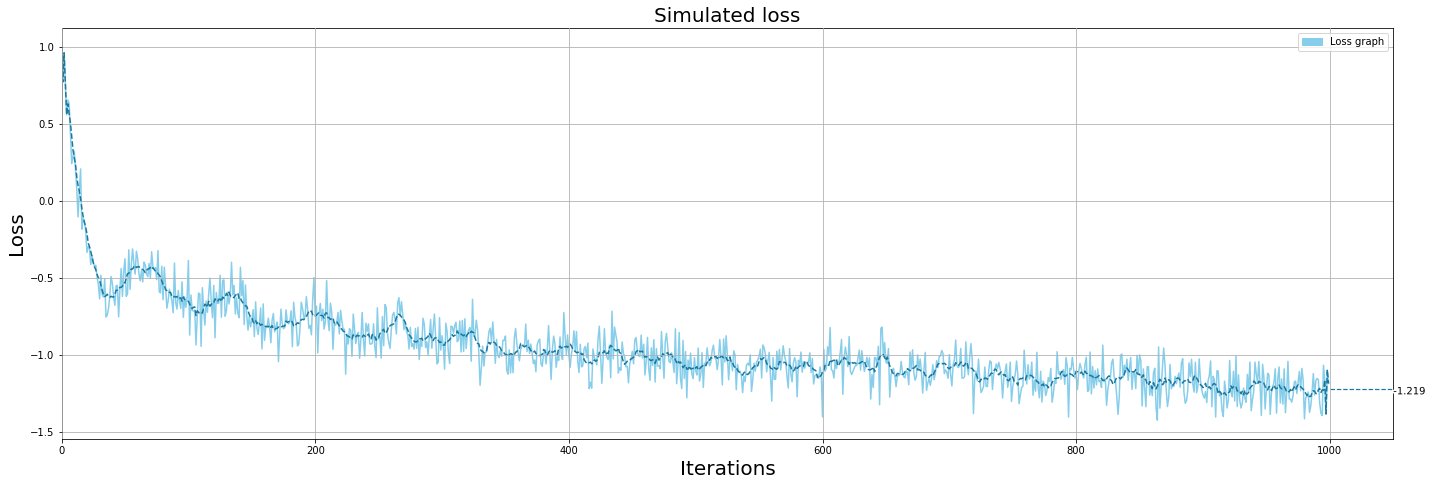

In [4]:
figure_params = {
    'figsize': (20, 7)
}

annotation_params = {
    'title_label': 'Simulated loss'
}

plot_loss(y0, **figure_params, **annotation_params)

To change rolling mean window size specify it in `rolling_mean` parameter.

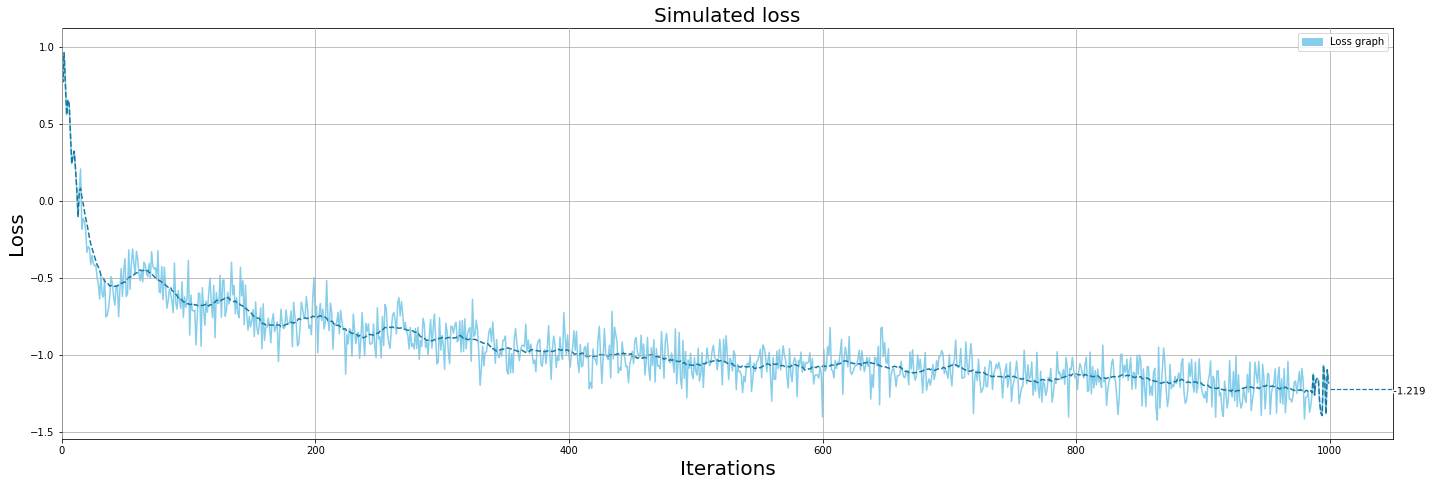

In [5]:
curve_params = {'rolling_mean': 30}

plot_loss(y0, **figure_params, **curve_params, **annotation_params)

To modify mean of last `n` iterations address `final_mean` parameter.

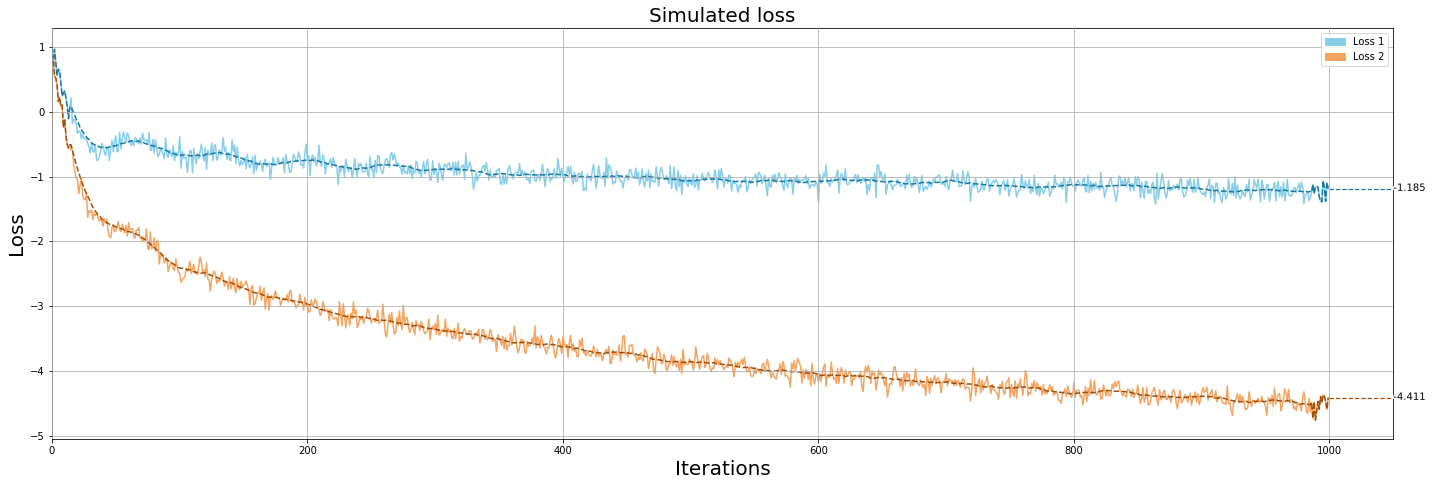

In [6]:
curve_params['final_mean'] = 200
annotation_params['legend_label'] = ['Loss 1', 'Loss 2']

plot_loss([y0, y1], **figure_params, **curve_params, **annotation_params)

To display curves separately use `separate` bool flag.

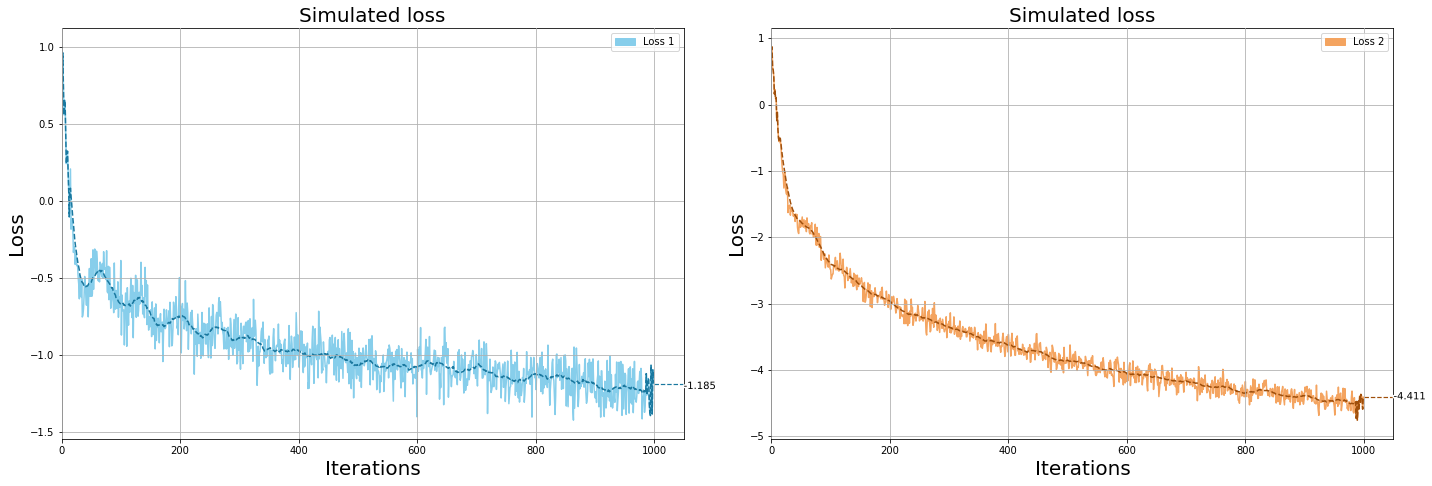

In [7]:
plot_loss([y0, y1], separate=True, **figure_params, **curve_params, **annotation_params)

To display curves in 'mixed' manner, i.e. with some curves overlaid and some displayed separately, use nested lists of arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

Note, that parameters should have same nestedness level.

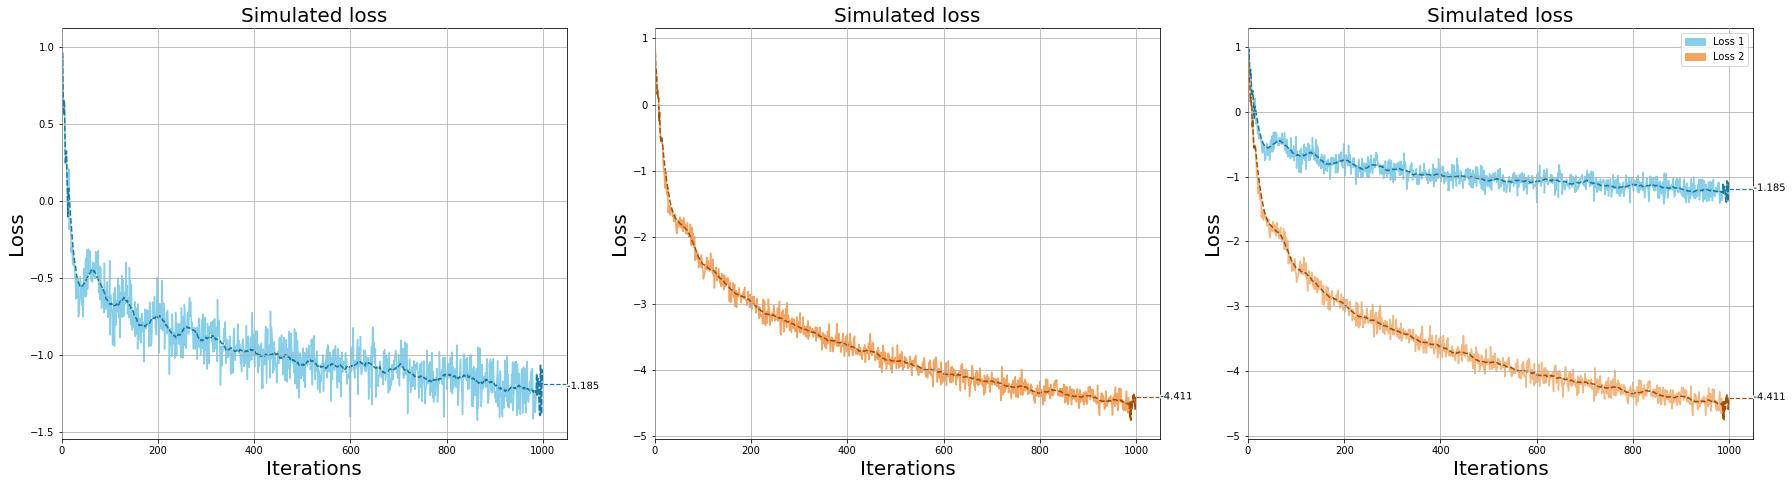

In [8]:
figure_params['figsize'] = (25, 7)

annotation_params['legend_label'] = [None, None, ['Loss 1', 'Loss 2']]

curve_params['color'] = [['skyblue'], ['sandybrown'], ['skyblue', 'sandybrown']]
curve_params['alpha'] = [[1.], [1.], [1., .8]]

plot_loss([y0, y1, [y0, y1]], **figure_params, **curve_params, **annotation_params)